# Introduction to Dynamic Programming

We have studied the theory of dynamic programming in discrete time under certainty. Let's review what we know so far, so that we can start thinking about how to take to the computer.

# The Problem

We want to find a sequence $\{x_t\}_{t=0}^\infty$ and a function $V^*:X\to\mathbb{R}$ such that 

$$V^{\ast}\left(x_{0}\right)=\sup\limits _{\left\{ x_{t}\right\} _{t=0}^{\infty}}\sum\limits _{t=0}^{\infty}\beta^{t}U(x_{t},x_{t+1})$$ 

subject to $x_{t+1}\in G(x_{t})\subseteq X\subseteq\mathbb{R}^K$, for all $t\geq0$ and $x_0\in\mathbb{R}$ given. We assume $\beta\in(0,1)$.

We have seen that we can analyze this problem by solving instead the related problem 

$$V(x)=\sup\limits _{y\in G(x)}\left\{ U(x,y)+\beta V(y)\right\} ,\text{ for all }x\in X.$$

# Basic Results

## Assumptions

1. $G\left(x\right)$  is nonempty for all $x\in X$ ; and for all $x_{0}\in X$  and $\mathbf{x}\in \Phi (x_{0})$, $\lim\nolimits_{n\rightarrow\infty}\sum_{t=0}^{n}\beta^{t}U(x_{t},x_{t+1})$ exists and is finite.

2. $X$  is a compact subset of $\mathbb{R}^{K}$, $G$ is nonempty, compact-valued and continuous. Moreover, $U:\mathbf{X}_{G}\rightarrow\mathbb{R}$  is continuous, where $\mathbf{X}_{G}=\left\{ (x,y)\in X\times X:y\in G(x)\right\}$

3. $U$ is strictly concave and $G$  is convex

4. For each $y\in X$, $U(\cdot,y)$  is strictly increasing in each of its first $K$  arguments, and $G$  is monotone in the sense that $x\leq x^{\prime}$  implies $G(x)\subset G(x^{\prime})$.

5. $U$  is continuously differentiable on the interior of its domain $\mathbf{X}_{G}$.

6. Let $\Phi (x_{t})=\{\{x_{s}\}_{s=t}^{\infty}:x_{s+1}\in G(x_{s})\text{, for }s=t,t+1,...\}$ and assume that $\lim_{t\rightarrow\infty}\beta^{t}V\left(x_{t}\right)=0$  for all $\left(x,x_{1},x_{2},...\right)\in \Phi (x)$.

If all of these conditions are satisfied, then we have the following

## Theorem

*There exists a unique (value) function $V^*(x_0)=V(x_0)$, which is continuous, strictly increasing, strictly concave, and differentiable. Also, there exists a unique path $\{x^*_t\}_{t=0}^\infty$, which starting from the given $x_0$ attains the value $V^*(x_0)$. The path can be found through a unique continuous policy function $\pi: X\to X$ such that $x^*_{t+1}=\pi(x^*_t)$.*

# Taking it to the computer

Ok. Now that we know the conditions for the existence and uniqueness (plus other characteristics) of our problem, how do we go about solving it?

The idea is going to be simple and is based on what we saw when we proved the contraction mapping theorem and the proof of the previous theorem (Yes I know...we split this in various steps and intermediate results, which might have confused you). 

Remember that our Bellman Operator $T: C(X)\to C(X)$ defined as 

$$T(V(x))\equiv\sup\limits _{y\in G(x)}\left\{ U(x,y)+\beta V(y)\right\}$$

assigns a continuous, strictly increasing, strictly concave function $T(V)$ to each continuous, increasing, and concave function $V$ defined on $X$. Since $T(V)$ is a contraction mapping, we know that if $V_0$ is any initial continuous, increasing, and concave function defined on $X$, then $T^n(V_0)\to V^*$. This is precisely what we are going to do using the computer (well we will also do it by hand for a couple of examples).

## Value function iteration

So, now that we have a strategy to tackle the problem, and you have learned some basic Python at [Code Academy](http://codeacademy.com) and IPython in our other [notebook](IntroPython.ipynb), we are ready to write some code and do some dynamic economic analysis.

But before we start, there is one issue I want to highlight. Notice that our state space $X$ is not assumed to be finite, and clearly the fact that our functions are continuous imply that we cannot be in a finite problem. So how do we represent such an infinite object in a computer, which only has finite memory? The solution is to take an approximation to the function, what Stachurski (2009) calls a fitted function. There are various methods to approximate functions (see Judd (1998) for an excellent presentation). The simplest method is a linear interpolation, which is what we will use here. 

The idea behind linear interpolation is quite simple. Assume we want to approximate the function $V: X\to X$, $X\subseteq\mathbb{R}$. The only thing we need is a finite set $\{x_i\}_{i=0}^N\subseteq X$ for which we compute the value under $V$, i.e. we create the finite set of values $\{V_i=V(x_i)\}_{i=0}^N$. Then our approximation to the function $V$, $\hat V$, will be defined as

$$\hat V(x)=V_{i-1}+\frac{V_i-V_{i-1}}{x_i-x_{i-1}}(x-x_{i-1}) \quad\text{ if } x_{i-1}\le x < x_i.$$

In principle we could construct our own interpolation function, but [Scipy](http://www.scipy.org/) has already [optimized approximation algorithms](http://docs.scipy.org/doc/scipy/reference/interpolate.html), so let's use that package instead. Let's see what a linear interpolation of $\sin(x)$ would look like.

In [1]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
from scipy import interp

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
interp?

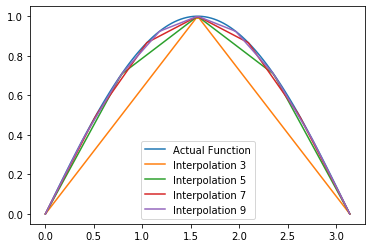

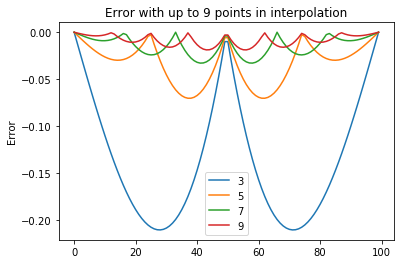

In [3]:
x = np.linspace(0,np.pi,100)
plt.figure(1)
plt.plot(x,np.sin(x),label='Actual Function')
for  i in np.arange(3,11,2):
    fig1 = plt.figure(1)
    xp = np.linspace(0,np.pi,i)
    yp = np.sin(xp)
    y = interp(x,xp,yp)
    plt.plot(x,y,label='Interpolation '+str(i))
    fig2 = plt.figure(2)
    plt.title('Error with up to '+str(i)+' points in interpolation')
    plt.ylabel('Error')
    plt.plot(y-np.sin(x),label=str(i))
    plt.legend(loc=8)
plt.figure(1)
plt.legend(loc=8)
plt.show()

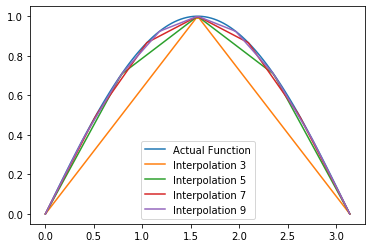

In [4]:
fig1

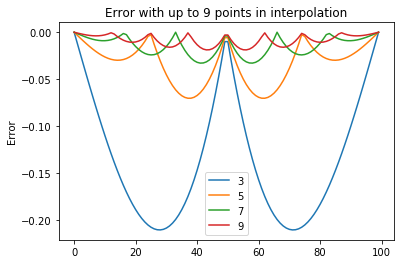

In [5]:
fig2

Clearly the more points we have the better our approximation. But, more points means more computations and more time to get those approximations. Since we will be iterating over approximations, we might not want to use too many points, but be smart about the choice of points or we might want to use less points for a start and then increase the number of points once we have a good candidate solution to our fixed point problem.

In order to make it easy to define interpolated functions, we define a new class of Python object

In [6]:
class LinInterp:
    "Provides linear interpolation in one dimension."

    def __init__(self, X, Y):
        """Parameters: X and Y are sequences or arrays
        containing the (x,y) interpolation points.
        """
        self.X, self.Y = X, Y

    def __call__(self, z):
        """Parameters: z is a number, sequence or array.
        This method makes an instance f of LinInterp callable,
        so f(z) returns the interpolation value(s) at z.
        """
        if isinstance(z, int) or isinstance(z, float):
            return interp ([z], self.X, self.Y)[0]
        else:
            return interp(z, self.X, self.Y)

We can now define our interpolated sinus function as follows

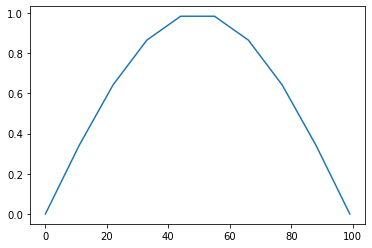

In [7]:
xp = np.linspace(0,np.pi,10)
yp = np.sin(xp)
oursin = LinInterp(xp,yp)
plt.plot(oursin(x));

## Optimal Growth

Let's start by computing the solution to an optimal growth problem, in which a social planner seeks to find paths $\{c_t,k_t\}$ such that

\begin{align}
\max_{\{c_t,k_t\}}&\sum_{t=0}^{\infty}\beta^{t}u(c_{t})\\[.2cm]
\text{s.t. }&k_{t+1}\leq f(k_{t})+(1-\delta)k_{t}-c_{t}\\[.2cm]
c_{t}\geq0,&\ k_{t}\geq0,\ k_{0}\text{ is given}.
\end{align}

As usual we assume that our utility function $u(\cdot)$ and production function $f(\cdot)$ are Neoclassical. Under these conditions we have seen that our problem satisfies the conditions of our previous theorem and thus we _know_ a unique solution exists.

### An example with analytical solution

Let's assume that $u(c)=\ln(c)$, $f(k)=k^\alpha$, and $\delta=1$. For this case we have seen that the solution implies

\begin{align}
&\text{Value Function: } &  V(k)=&\frac{\ln(1-\alpha\beta)}{1-\beta}+\frac{\alpha\beta\ln(\alpha\beta)}{(1-\alpha\beta)(1-\beta)}+\frac{\alpha}{1-\alpha\beta}\ln(k)\\[.2cm]
&\text{Optimal Policy: } & \pi\left(k\right)=&\beta\alpha k^{\alpha} \\[.2cm]
&\text{Optimal Consumption Function: } & c=&\left(1-\beta\alpha\right)k^{\alpha}\\[.2cm]
\end{align}

We will use these to compare the solution found by iteration of the Value function described above. Copy the Python functions you had defined in the previous notebook into the cell below and define Python functions for the actual optimal solutions given above.

In [8]:
%%file optgrowthfuncs.py
def U(c, sigma=1):
    '''This function returns the value of utility when the CRRA
    coefficient is sigma. I.e. 
    u(c,sigma)=(c**(1-sigma)-1)/(1-sigma) if sigma!=1 
    and 
    u(c,sigma)=ln(c) if sigma==1
    Usage: u(c,sigma)
    '''
    if sigma!=1:
        u = (c**(1-sigma)-1) / (1-sigma)
    else:
        u = np.log(c)
    return u

def F(K, L=1, alpha=.3, A=1):
    '''
    Cobb-Douglas production function
    F(K,L)=K^alpha L^(1-alpha)
    '''
    return K**alpha * L**(1-alpha)

def Va(k, alpha=.3, beta=.9):
    ab = alpha*beta
    return np.log(1-ab) / (1-beta) + ab * np.log(ab) / ((1-beta) * (1-ab)) + alpha * np.log(k) / (1-ab)

def opk(k, alpha=.3, beta=.9):
    return alpha * beta * k**alpha

def opc(k, alpha=.3, beta=.9):
    return (1-alpha*beta)*k**alpha

Overwriting optgrowthfuncs.py


In [9]:
%load optgrowthfuncs.py

Let's fix the value of the fundamental parameters so we can realize computations

In [10]:
alpha = .3
beta = .9
sigma = 1
delta = 1

Now let's focus on the Value function iteration:

In [11]:
# Grid of values for state variable over which function will be approximated
gridmin, gridmax, gridsize = 0.1, 5, 300
grid = np.linspace(gridmin, gridmax**1e-1, gridsize)**10

Here we have created a grid on $[gridmin,gridmax]$ that has a number of points given by `gridsize`. Since we know that the Value functions is stricly concave, our grid has more points closer to zero than farther away

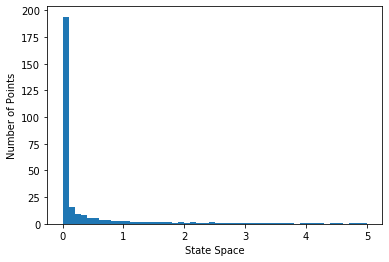

In [12]:
plt.hist(grid,bins=50);
plt.xlabel('State Space');
plt.ylabel('Number of Points');

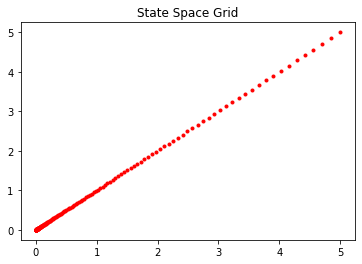

In [13]:
plt.plot(grid,grid,'r.');
plt.title('State Space Grid');

Now we need a function, which for given $V_0$ solves 

$$\sup\limits _{y\in G(x)}\left\{ U(x,y)+\beta V(y)\right\}.$$

Let's use one of Scipy's optimizing routines

In [14]:
from scipy.optimize import fminbound
fminbound?

Since `fminbound` returns 

$$\arg\min\limits _{y\in [\underline x,\bar x]}\left\{ U(x,y)+\beta V(y)\right\}$$

we have to either replace our objective function for its negative or, better yet, define a function that uses `fminbound` and returns the maximum and the maximizer

In [15]:
# Maximize function V on interval [a,b]
def maximum(V, a, b):
    return float(V(fminbound(lambda x: -V(x), a, b)))

# Return Maximizer of function V on interval [a,b]
def maximizer(V, a, b):
    return float(fminbound(lambda x: -V(x), a, b))

### Note

We could have included other parameters to pass to our `maximizer` and `maximum` functions, e.g. to allow us to manipulate the options of `fminbound`

### The Bellman Operator

In [16]:
# The following two functions are used to find the optimal policy and value functions using value function iteration
# Bellman Operator
def bellman(w):
    """The approximate Bellman operator.
    Parameters: w is a LinInterp object (i.e., a 
    callable object which acts pointwise on arrays).
    Returns: An instance of LinInterp that represents the optimal operator.
    w is a function defined on the state space.
    """
    vals = []
    for k in grid:
        kmax = F(k, alpha=alpha)
        h = lambda kp: U(kmax + (1-delta) * k - kp,sigma) + beta * w(kp)
        vals.append(maximum(h, 0, kmax))
    return LinInterp(grid, vals)

In [17]:
# Optimal policy
def policy(w):
    """
    For each function w, policy(w) returns the function that maximizes the 
    RHS of the Bellman operator.
    Replace w for the Value function to get optimal policy.
    The approximate optimal policy operator w-greedy (See Stachurski (2009)). 
    Parameters: w is a LinInterp object (i.e., a 
    callable object which acts pointwise on arrays).
    Returns: An instance of LinInterp that captures the optimal policy.
    """
    vals = []
    for k in grid:
        kmax = F(k,alpha=alpha)
        h = lambda kp: U(kmax + (1-delta) * k - kp,sigma) + beta * w(kp)
        vals.append(maximizer(h, 0, kmax))
    return LinInterp(grid, vals)

Given a linear interpolation of our guess for the Value function, $V_0=w$, the first function returns a `LinInterp` object, which is the linear interpolation of the function generated by the Bellman Operator on the finite set of points on the grid. The second function returns what Stachurski (2009) calls a _w-greedy_ policy, i.e. the function that maximizes the RHS of the Bellman Operator.

Now we are ready to work on the iteration

In [18]:
# Parameters for the optimization procedures
count = 0
maxiter = 1000
tol = 1e-6
print('tol=%f' % tol)

tol=0.000001


Our initial guess $V_0$

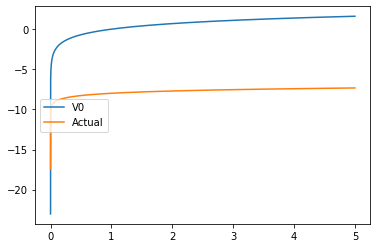

In [19]:
V0 = LinInterp(grid,U(grid))
plt.figure(1)
plt.plot(grid,V0(grid), label='V'+str(count));
plt.plot(grid,Va(grid), label='Actual');
plt.legend(loc=6);

After one interation

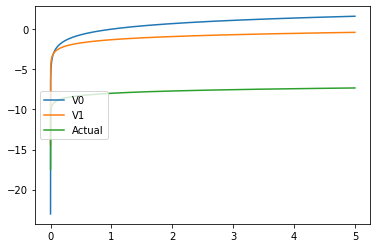

In [20]:
plt.plot(grid,V0(grid), label='V'+str(count));
count+=1
V0=bellman(V0)
plt.figure(1)
plt.plot(grid,V0(grid), label='V'+str(count));
plt.plot(grid,Va(grid), label='Actual');
plt.legend(loc=6);
plt.show();

Doing it by hand is too slow..let's automate this process

137


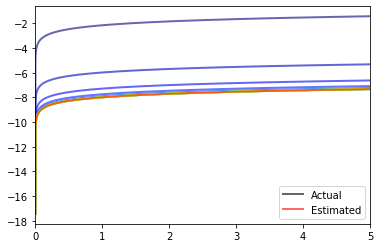

In [21]:
fig, ax = plt.subplots()
ax.set_xlim(grid.min(), grid.max())
ax.plot(grid,Va(grid), label='Actual', color='k', lw=2, alpha=0.6);

count=0
maxiter=200
tol=1e-6
while count<maxiter:
    V1 = bellman(V0)
    err = np.max(np.abs(np.array(V1(grid))-np.array(V0(grid))))
    if np.mod(count,10)==0:
        ax.plot(grid,V1(grid), color=plt.cm.jet(count / maxiter), lw=2, alpha=0.6);
        #print('%d %2.10f ' % (count,err))
    V0=V1
    count+=1
    if err<tol:
        print(count)
        break
ax.plot(grid,V1(grid), label='Estimated', color='r', lw=2, alpha=0.6);
ax.legend(loc='lower right')
plt.draw();

Does it look like we converged? Let's compare our estimated Value function `V1` and the actual function `Va` and compute the error at each point.

5.438395707102472e-07
0.00043285506130530393


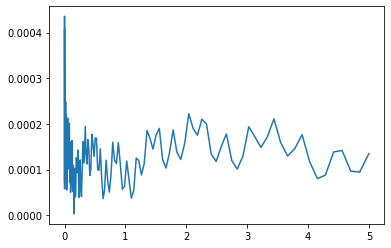

In [22]:
print(err)
err = Va(grid)-V1(grid)
plt.plot(grid,err);
print(err.max()-err.min())

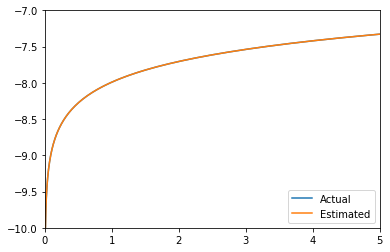

In [23]:
fig, ax = plt.subplots()
ax.set_ylim(-10, -7)
ax.set_xlim(grid.min(), grid.max())
ax.plot(grid,Va(grid),label='Actual')
ax.plot(grid,V1(grid)+err.mean(),label='Estimated')
ax.legend(loc='lower right')
plt.show();

### Exercise

1. Use the `policy` function to compute the optimal policy. Compare it to the actual one
2. Do the same for the consumption function. Find the savings rate and plot it.
3. Construct the paths of consumption and capital starting from $k_0=.1$. Show the time series and the paths in the consumption-capital space
4. Estimate the level of steady state capital and consumption. Show graphically that it is lower than the _Golden Rule Level_.
5. Repeat the exercise with other values of $\alpha,\beta,\delta,\sigma,k_0$. Can you write a function or class such that it will generate the whole analysis for given values of the parameters and functions. Can you generalize it in order to analyze the effects of changing the utility or production functions?